In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

In [5]:
def liner_contrast(image_rgb, alpha=0.5, beta=10):
    return cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

def gamma_correction(image_rgb, gamma=3.2):
    gamma_correction = ((image_rgb/255.0) ** gamma) * 255
    return np.clip(gamma_correction, 0, 255).astype(np.uint8)

def histogram_equalization(image_rgb):
    gray_img = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    equlized_image = cv2.equalizeHist(gray_img)
    return cv2.cvtColor(equlized_image, cv2.COLOR_GRAY2RGB)

def blur_image(image_rgb, kernel_size=(5, 5)):
    blurred_image = cv2.GaussianBlur(image_rgb, kernel_size, 0)
    return blurred_image

def edge_detection(image_rgb, low_threshold=50, high_threshold=150):
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray_image, low_threshold, high_threshold)
    edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return edges_rgb

def adjust_saturation(image_rgb, saturation_factor=1.5):
    hsv_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255).astype(np.uint8)
    adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return adjusted_image

def logarithmic_transform(image_rgb):
    log_transformed_image = np.log1p(image_rgb.astype(np.float32))
    return (log_transformed_image / np.max(log_transformed_image) * 255).astype(np.uint8)

def inverse_logarithmic_transform(log_transformed_image):
    inverse_log_transformed_image = np.expm1(log_transformed_image.astype(np.float32))
    return (inverse_log_transformed_image / np.max(inverse_log_transformed_image) * 255).astype(np.uint8)

def power_law_transform(image_rgb, gamma=0.5):
    power_law_transformed_image = (image_rgb / 255.0) ** gamma * 255
    return np.clip(power_law_transformed_image, 0, 255).astype(np.uint8)

def enhance_and_display(image_path):
    image_path = cv2.imread(image_path)

In [6]:
image = cv2.imread('/content/OIP.jpeg')
input_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
liner_contrast_output = liner_contrast(input_image, alpha=0.5, beta=10)
gamma_correction_output = gamma_correction(input_image, gamma=3.2)
histogram_equalization_output = histogram_equalization(input_image)

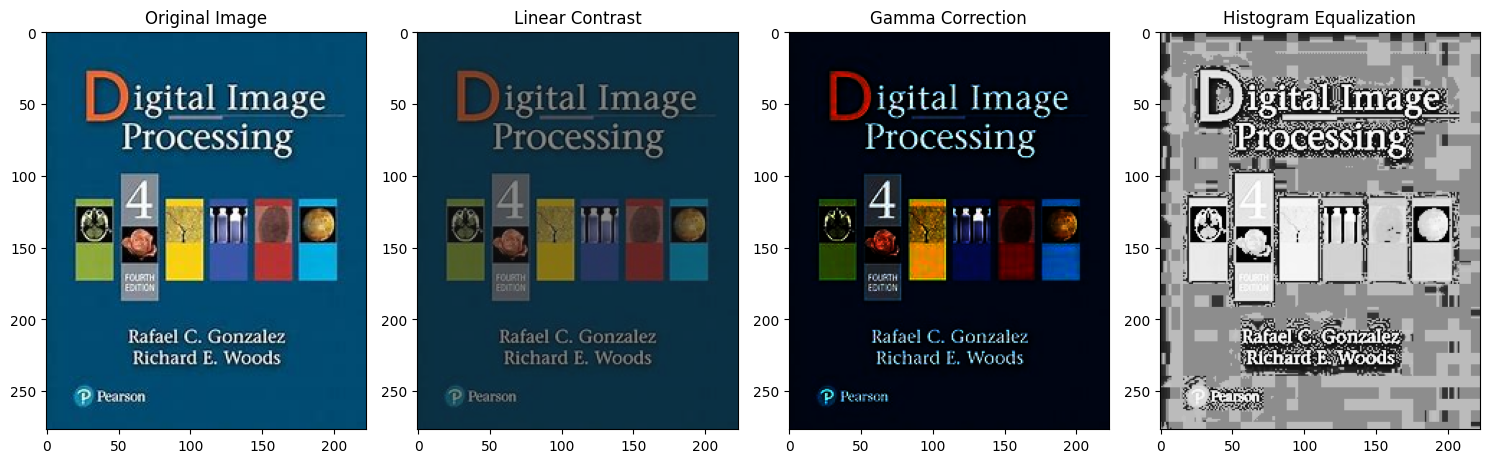

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(input_image)
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(liner_contrast_output)
plt.title('Linear Contrast')

plt.subplot(1, 4, 3)
plt.imshow(gamma_correction_output)
plt.title('Gamma Correction')

plt.subplot(1, 4, 4)
plt.imshow(histogram_equalization_output)
plt.title('Histogram Equalization')

plt.tight_layout()
plt.show()

<ipython-input-9-e5a934afa24a>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 8, 4)
<ipython-input-5-59d1b14d1b04>:34: RuntimeWarning: overflow encountered in expm1
  inverse_log_transformed_image = np.expm1(log_transformed_image.astype(np.float32))
<ipython-input-5-59d1b14d1b04>:35: RuntimeWarning: invalid value encountered in divide
  return (inverse_log_transformed_image / np.max(inverse_log_transformed_image) * 255).astype(np.uint8)
<ipython-input-5-59d1b14d1b04>:35: RuntimeWarning: invalid value encountered in cast
  return (inverse_log_transformed_image / np.max(inverse_log_transformed_image) * 255).astype(np.uint8)
<ipython-input-9-e5a934afa24a>:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 

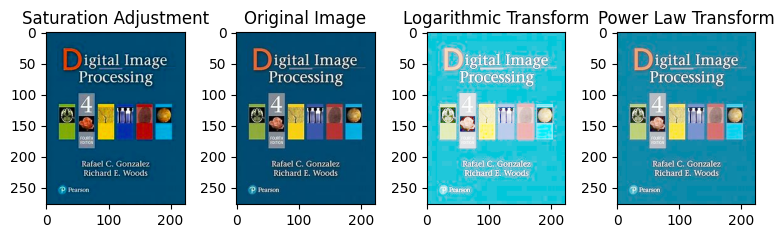

In [9]:
# Load the input image (assuming 'input_image.jpg' is replaced with the actual path)
input_image = cv2.imread('/content/OIP.jpeg')
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Apply the image processing functions
blur_output = blur_image(input_image_rgb)
edge_detection_output = edge_detection(input_image_rgb)
saturation_adjustment_output = adjust_saturation(input_image_rgb)

# Visualize the results
plt.figure(figsize=(15, 5))

plt.subplot(4, 2, 1)
plt.imshow(input_image_rgb)
plt.title('Original Image')

plt.subplot(4, 2, 2)
plt.imshow(blur_output)
plt.title('Blur')

plt.subplot(4, 2, 3)
plt.imshow(edge_detection_output)
plt.title('Edge Detection')

plt.subplot(1, 8, 4)
plt.imshow(saturation_adjustment_output)
plt.title('Saturation Adjustment')

# Apply the image processing functions
logarithmic_transform_output = logarithmic_transform(input_image_rgb)
inverse_logarithmic_transform_output = inverse_logarithmic_transform(input_image_rgb)
power_law_transform_output = power_law_transform(input_image_rgb, gamma=0.5)

# Visualize the results
plt.subplot(1, 8, 5)
plt.imshow(input_image_rgb)
plt.title('Original Image')

plt.subplot(1, 8, 6)
plt.imshow(logarithmic_transform_output)
plt.title('Logarithmic Transform')

plt.subplot(1, 8, 7)
plt.imshow(power_law_transform_output)
plt.title('Power Law Transform')

plt.tight_layout()
plt.show()